## 設定

In [2]:
import os
import sys
import warnings

os.environ["CUDA_VISIBLE_DEVICES"] = "2"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
sys.path.append(os.getcwd())
sys.path.append("..")
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
# TF/Keras
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.layers import Input, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.manifold import TSNE
from matplotlib.animation import FuncAnimation



In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# フォントの設定
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = [
    "Hiragino Gothic Pro",
    "Yu Gothic",
    "Meirio",
    "Takao",
    "IPAexGothic",
    "IPAPGothic",
    "VL PGothic",
    "Noto Sans CJK JP",
]
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.size"] = 17
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
# 軸の設定
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["axes.linewidth"] = 2.0
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["grid.color"] = "black"

# 凡例の設定
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.framealpha"] = 0.0
plt.rcParams["legend.handlelength"] = 1.0
plt.rcParams["legend.labelspacing"] = 0.4
plt.rcParams["legend.handletextpad"] = 0.8
plt.rcParams["legend.markerscale"] = 1.0

##　データロード

In [25]:


# Define the file paths
pred_file_path1 = ["/data/Users/tsutsumi/VRNN/result/flame_1199/pred/100/proj1/pred_No23_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/100/proj1/pred_No24_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/100/proj1/pred_No25_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/100/proj1/pred_No26_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/100/proj1/pred_No27_h32z4rate0005.npy",
                  ]

pred_file_path0 = ["/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate00001/pred_No23_h32z4rate001.npy",
                   "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate00001/pred_No24_h32z4rate001.npy",
                   "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate00001/pred_No25_h32z4rate001.npy",
                   "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate00001/pred_No26_h32z4rate001.npy",
                   "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate00001/pred_No27_h32z4rate001.npy",
                  ]

pred_file_path_all = ["/data/Users/tsutsumi/VRNN/result/flame_1199/pred/100/proj_all/pred_No23_h32z4rate0005.npy",
                      "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/100/proj_all/pred_No24_h32z4rate0005.npy",
                      "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/100/proj_all/pred_No25_h32z4rate0005.npy",
                      "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/100/proj_all/pred_No26_h32z4rate0005.npy",
                      "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/100/proj_all/pred_No27_h32z4rate0005.npy",
                  ]

proj_file_path= ["/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No11_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No12_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No13_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No14_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No15_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No16_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No17_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No18_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No19_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No20_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No21_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No22_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No23_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No24_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No25_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No26_h32z4rate0005.npy",
                  "/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_No27_h32z4rate0005.npy",
                  ]


# Empty lists to store data
pred_data_list = []
pred_data_list0 = []
pred_data_list1 = []
pred_data_list_all = []
pred_data_list_pre = []
proj_data_list = []

for file_path in proj_file_path:
    data_proj = np.load(file_path)  # Use np.load() for .npy files
    proj_data_list.append(data_proj)


for file_path in pred_file_path0:
    data_pred = np.load(file_path)  # Use np.load() for .npy files
    pred_data_list0.append(data_pred)

for file_path in pred_file_path1:
    data_pred1 = np.load(file_path)  # Use np.load() for .npy files
    pred_data_list1.append(data_pred1)

for file_path in pred_file_path_all:
    data_pred_all = np.load(file_path)  # Use np.load() for .npy files
    pred_data_list_all.append(data_pred_all)


# Stack the data
proj_data = np.column_stack(proj_data_list)
pred_data0 = np.column_stack(pred_data_list0)
pred_data1 = np.column_stack(pred_data_list1)
pred_data_all = np.column_stack(pred_data_list_all)

In [7]:
np.save("/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_all.npy", proj_data)

In [ ]:

z_file_path = ["/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No11_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No12_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No13_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No14_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No15_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No16_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No17_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No18_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No19_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No20_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No21_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No22_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No23_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No24_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No25_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No26_h32z4rate001.npy",
               "/data/Users/tsutsumi/VRNN/result/VRNN_z/frame_1200/G/slice100/z4h32rate00001/z_No27_h32z4rate001.npy"
                  ]


z_data_list = []


# Load prediction data
for file_path in z_file_path:
    z_pred = np.load(file_path)  # Use np.load() for .npy files
    z_data_list.append(z_pred)

z_data = np.column_stack(z_data_list)

In [34]:
# new
Q_876 = pd.read_csv('/data/Users/tsutsumi/VRNN/data/Original_Data/Figure3/paQuasAr3_dia10-8_-7_-6.csv', encoding='utf-8')
G_876 = pd.read_csv('/data/Users/tsutsumi/VRNN/data/Original_Data/Figure3/GCaMP_dia10-8_-7_-6.csv', encoding='utf-8')

# NumPy 配列に変換
Q_876_numpy = Q_876.to_numpy()
G_876_numpy = G_876.to_numpy()

# 配列の転置（N x Tにする）(27, 1199)
x_Q876 = Q_876.to_numpy().transpose((1, 0))
x_G876 = G_876.to_numpy().transpose((1, 0))

x_Q876x200 = (x_Q876-1) * 1000
x_G876x200 = (x_G876-1) * 400
Q_test = x_Q876x200[22:, 200:]

In [14]:
def calculate_nrmse(y_true, y_pred):
    # Initialize NRMSE array
    nrmse_values = np.zeros(y_true.shape[0])
    
    # Calculate NRMSE for each row in y_true and corresponding column in y_pred
    for i in range(y_true.shape[0]):
        rmse = np.sqrt(np.mean((y_true[i, :] - y_pred[:, i]) ** 2))
        range_y_true = np.max(y_true[i, :]) - np.min(y_true[i, :])
        nrmse_values[i] = rmse / range_y_true
    
    return nrmse_values

In [21]:
def calculate_rmse(y_true, y_pred):
    # Initialize NRMSE array
    rmse_values = np.zeros(y_true.shape[0])
    
    # Calculate NRMSE for each row in y_true and corresponding column in y_pred
    for i in range(y_true.shape[0]):
        rmse = np.sqrt(np.mean((y_true[i, :] - y_pred[:, i]) ** 2))
        rmse_values[i] = rmse
    
    return rmse_values

In [36]:
Nrmse1 = calculate_nrmse(Q_test, pred_data1)
Nrmse0 = calculate_nrmse(Q_test, pred_data0[100:,:])
Nrmse_all = calculate_nrmse(Q_test, pred_data_all)
Nrmse_pre = calculate_nrmse(Q_test, pred_data_pre)

Rmse1 = calculate_rmse(Q_test, pred_data1)
Rmse0 = calculate_rmse(Q_test, pred_data0[100:, :])
Rmse_all = calculate_rmse(Q_test, pred_data_all)
Rmse_pre = calculate_rmse(Q_test, pred_data_pre)

In [37]:
print("Nrmse1:", Nrmse1, sep="\n")
print("Nrmse0:", Nrmse0, sep="\n")
print("Nrmse_all:", Nrmse_all, sep="\n")
print("Nrmse_pre:", Nrmse_pre, sep="\n")

print("Rmse1:", Rmse1, sep="\n")
print("Rmse0:", Rmse0, sep="\n")
print("Rmse_all:", Rmse_all, sep="\n")
print("Rmse_pre:", Rmse_pre, sep="\n")

Nrmse1:
[0.23279213 0.18076256 0.18920533 0.13125248 0.15177244]
Nrmse0:
[0.26765085 0.15983353 0.11367791 0.14139863 0.1163939 ]
Nrmse_all:
[0.19000658 0.20189282 0.1685754  0.10828217 0.19162632]
Nrmse_pre:
[0.17459357 0.15812603 0.18886853 0.15817333 0.12287993]
Rmse1:
[8.66365099 7.41589292 8.18532033 9.51380609 5.94114561]
Rmse0:
[ 9.96096173  6.55726678  4.91788514 10.24924804  4.55624951]
Rmse_all:
[7.0713328  8.28277431 7.29283699 7.84880877 7.50122926]
Rmse_pre:
[ 6.49771849  6.48721568  8.17074955 11.46515813  4.81014588]


In [38]:
print("Nrmse1:", np.mean(Nrmse1), sep="\n")
print("Nrmse0:", np.mean(Nrmse0), sep="\n")
print("Nrmse_all:", np.mean(Nrmse_all), sep="\n")
print("Nrmse_pre:", np.mean(Nrmse_pre), sep="\n")

print("Rmse1:", np.mean(Rmse1), sep="\n")
print("Rmse0:", np.mean(Rmse0), sep="\n")
print("Rmse_all:", np.mean(Rmse_all), sep="\n")
print("Rmse_pre:", np.mean(Rmse_pre), sep="\n")

Nrmse1:
0.17715698892710058
Nrmse0:
0.15979096399524612
Nrmse_all:
0.17207665636474176
Nrmse_pre:
0.1605282784796283
Rmse1:
7.943963186728999
Rmse0:
7.248322236954715
Rmse_all:
7.5993964257979005
Rmse_pre:
7.486197545514633


## tsne

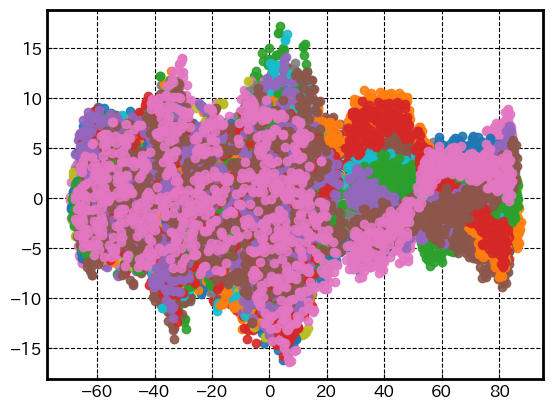

In [70]:
prexity = 35
iter = 1000
learning = 200
pre = "35"
ite = "1000"
learn = "200"
tsne = TSNE(n_components=2, perplexity=prexity, learning_rate=learning, n_iter = iter)
proj_all = []
for i in range (17):

    proj = tsne.fit_transform(z_data[:, 4*i:4*i+4])
    scatter = plt.scatter(proj[:, 0], proj[:, 1], cmap="rainbow", alpha=0.9)
    proj_all.append(proj)


In [6]:
np.save(f"/data/Users/tsutsumi/VRNN/result/flame_1199/pred/50/train/proj_all.npy", proj_data)


In [7]:
projj = np.load(f"/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_all.npy")

In [8]:
projj.shape

(1149, 34)

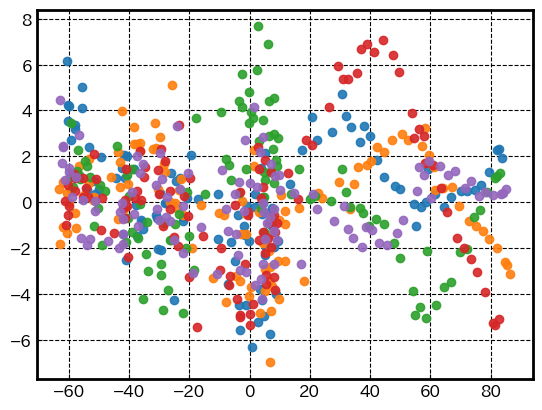

In [19]:
for i  in range (5):
    scatter = plt.scatter(result[i, :, 0], result[i, :, 1], cmap="rainbow", alpha=0.9)
    

In [11]:
def average_blocks_3d(data, block_size):
    """
    (17, 1099, 2) のデータに対して 1099 の軸で平均を取り、
    ブロック単位で縮小したデータを返す。

    Args:
        data (np.ndarray): 入力データ (17, 1099, 2)
        block_size (int): 平均を取るブロックサイズ

    Returns:
        np.ndarray: 平均後のデータ (17, block_count, 2)
    """
    # 17 と 2 の軸をそのままにして 1099 の軸を平均化
    num_blocks = (data.shape[1] + block_size - 1) // block_size  # ブロック数を計算
    averaged_data = []

    for i in range(num_blocks):
        start_idx = i * block_size
        end_idx = min((i + 1) * block_size, data.shape[1])  # 範囲を確保
        block_mean = data[:, start_idx:end_idx, :].mean(axis=1)  # 1099 軸で平均
        averaged_data.append(block_mean)

    # 平均値リストを結合して (17, num_blocks, 2) の形に
    return np.stack(averaged_data, axis=1)

In [18]:
result = average_blocks_3d(projj, 10)

 ## 平均

In [22]:

def average_rows_by_blocks(data, block_size):
    averaged_data = []
    for col in range(data.shape[1]):  # 各列に対して処理
        column_data = data[:, col]
        averaged_column = []

        for i in range(1099//block_size+1):  
            start_idx = i * block_size
            end_idx = (i + 1) * block_size
            if i == (1099//block_size):  # 最後のブロック処理
                end_idx = len(column_data)  # 最後のブロックは残りすべてを使う
            averaged_column.append(column_data[start_idx:end_idx].mean())

        averaged_data.append(averaged_column)

    return np.array(averaged_data).T  # 転置して [11, 5] の形に整形


In [23]:
averaged_pred_50 = average_rows_by_blocks(pred_data, block_size=50) 
averaged_proj_50 = average_rows_by_blocks(proj_data, block_size=50)

averaged_pred_25 = average_rows_by_blocks(pred_data, block_size=25) 
averaged_proj_25 = average_rows_by_blocks(proj_data, block_size=25)

In [24]:
averaged_pred_10 = average_rows_by_blocks(pred_data, block_size=10) 
averaged_proj_10 = average_rows_by_blocks(proj_data, block_size=10)

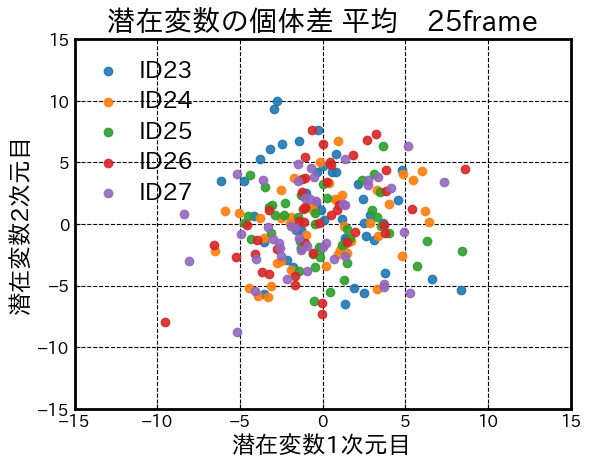

In [46]:
for i  in range (5):
    scatter = plt.scatter(averaged_proj_25[:, 2*i+1], averaged_proj_25[:, 2*i], cmap="rainbow", alpha=0.9, label = f"ID{i+23}")
    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    plt.legend()
    plt.title("潜在変数の個体差 平均　25frame")
    plt.xlabel("潜在変数1次元目")
    plt.ylabel("潜在変数2次元目")
    plt.savefig("/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate00001/id_mean25_proj.png")


In [26]:
averaged_proj_10.shape

(110, 10)

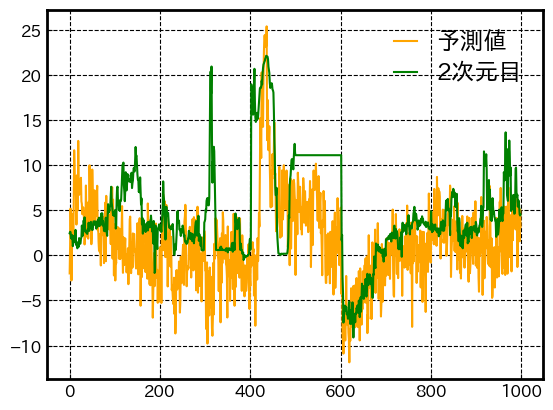

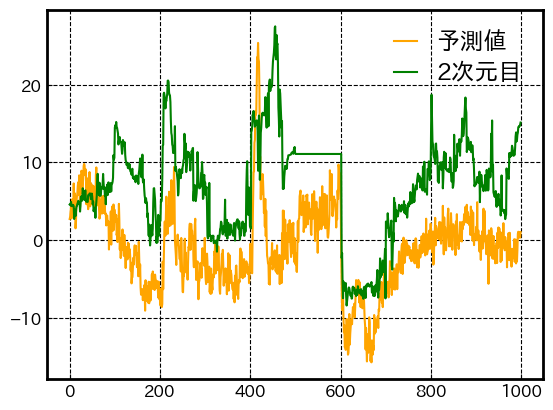

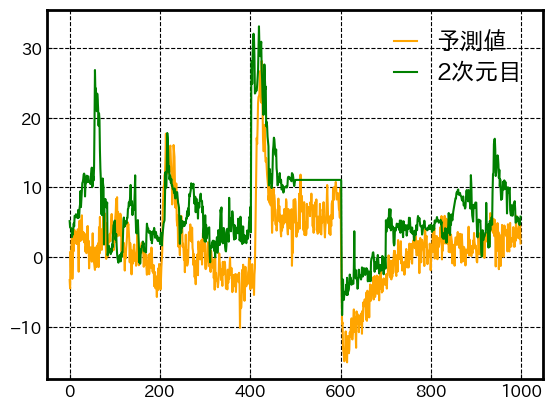

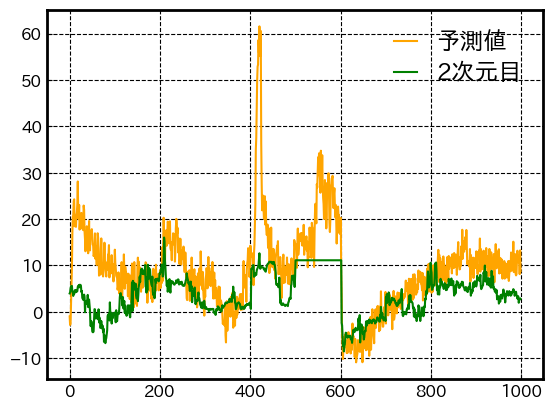

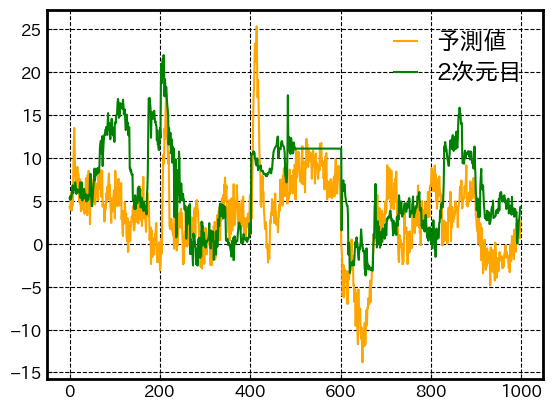

In [42]:
for i in range(5):
    plt.figure()
    plt.plot(Q_test[i, :], color = "orange", label = "予測値")
    plt.plot(pred_data[:, i], color = "green", label = "2次元目" )
    plt.legend()
    #plt.savefig(f"/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate00001/mean25_No.{i+23}_proj2.png")

In [ ]:



for i in range(5):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]})
    
    scat = ax1.scatter([], [], c=[], cmap="rainbow", alpha=0.9, vmin=min(averaged_pred[:, i]), vmax=max(averaged_pred[:, i]))
    blue_line, = ax1.plot([], [], color='blue', lw=2, label="刺激前")
    red_line, = ax1.plot([], [], color='red', lw=2, label="刺激中")  # Keep as line, not dots
    green_line, = ax1.plot([], [], color='green', lw=2, label="刺激後")
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-10, 10)
    ax1.set_xlabel("潜在変数 1次元目")
    ax1.set_ylabel("潜在変数 2次元目")
    ax1.legend()
    ax1.grid()
    
    norm = plt.Normalize(vmin=min(averaged_pred_25[:, i]), vmax=max(averaged_pred_25[:, i]))
    sm = plt.cm.ScalarMappable(cmap="rainbow", norm=norm)
    plt.colorbar(sm, ax=ax1)

    pred_line, = ax2.plot([], [], color="orange", lw=2)
    marker, = ax2.plot([], [], 'o', color="red")
    ax2.set_xlim(0, len(averaged_pred_25))
    ax2.set_ylim(min(averaged_pred_25[:, i]) - 1, max(averaged_pred_25[:, i]) + 1)
    ax2.grid()

    def update(frame):
        x = averaged_proj_25[:frame+1, i*2]
        y = averaged_proj_25[:frame+1, i*2+1]
        colors = averaged_pred_25[:frame+1, i]
        
        scat.set_offsets(np.c_[x, y])
        scat.set_array(colors)
        
        # Initialize green_x and green_y before conditionals to avoid UnboundLocalError
        green_x, green_y = [], []
        
        # Update blue, red, and green lines as per the new logic
        if frame < 8:
            blue_x, blue_y = x[:frame+1], y[:frame+1]
            red_x, red_y = [], []
        elif 8 <= frame < 32:
            blue_x, blue_y = x[:8], y[:8]
            red_x, red_y = x[7:frame+1], y[7:frame+1]
        elif 32 <= frame:
            blue_x, blue_y = x[:8], y[:8]
            green_x = x[31:frame+1]
            green_y = y[31:frame+1]
            red_x, red_y = x[8:32], y[8:32]
        
        blue_line.set_data(blue_x, blue_y)
        red_line.set_data(red_x, red_y)
        green_line.set_data(green_x, green_y)
        
        pred_line.set_data(range(frame+1), averaged_pred_25[:frame+1, i])
        marker.set_data(frame, averaged_pred_25[frame, i])
        
        return scat, blue_line, red_line, green_line, pred_line, marker

    ani = FuncAnimation(fig, update, frames=len(averaged_proj_25), interval=250, blit=False)
    ani.save(f"/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate00001/mean25_Animation{i+23}.mp4", writer="ffmpeg")
    plt.close(fig)


# document

In [45]:
frames = np.arange(1199)

# 矩形波の生成
def create_square_wave(frames):
    square_wave = np.full_like(frames, fill_value=1, dtype=float)
    square_wave[(frames >= 200) & (frames < 400)] = 1
    square_wave[(frames >= 400) & (frames < 600)] = 10
    square_wave[(frames >= 600) & (frames < 800)] = 100
    return square_wave

# 7つの矩形波を作成
x_si = np.array([create_square_wave(frames) for _ in range(27)])


In [38]:
proj_data = np.load(f"/data/Users/tsutsumi/VRNN/result/flame_1199/pred/slice100/z4h32rate001/proj_all.npy")

In [10]:
proj_data.shape

(1099, 34)

In [46]:
white_noise = x_si[:17, :]
for i in range(17):
    means = np.mean(proj_data[:, 2*i:2*i+2])
    stds = np.std(proj_data[:, 2*i:2*i+2])
    noise = np.random.normal(means, stds, len(x_si[1, 100:]))
    white_noise[i, 100:] = noise + white_noise[i, 100:]

In [1]:
pred_data1.shape

NameError: name 'pred_data1' is not defined

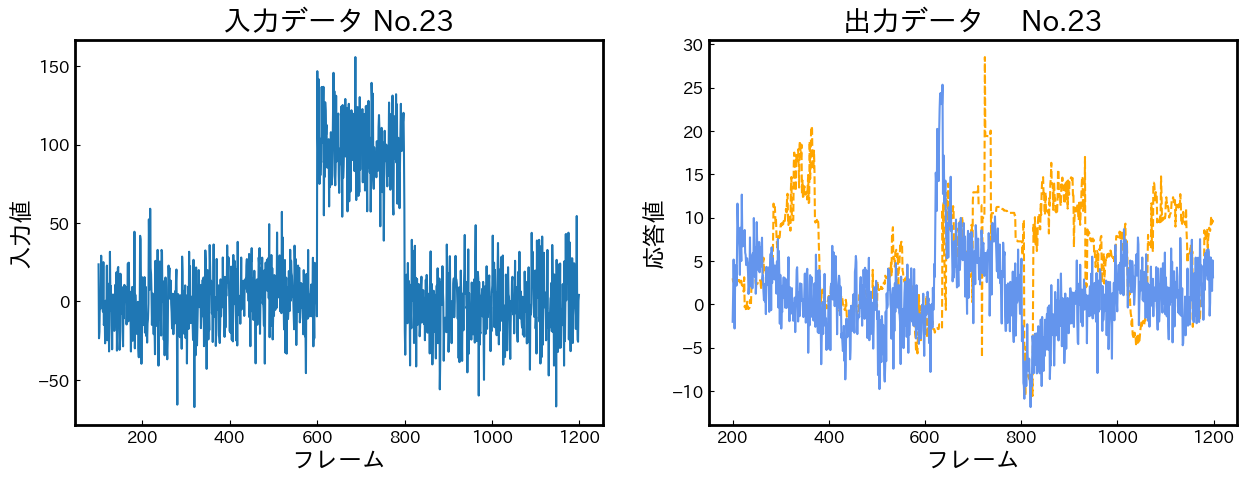

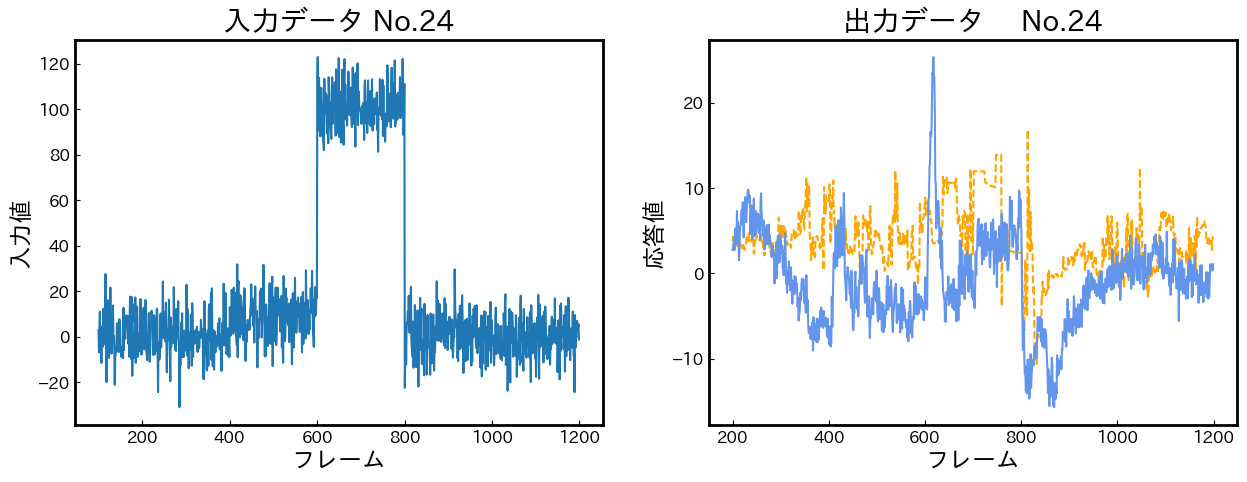

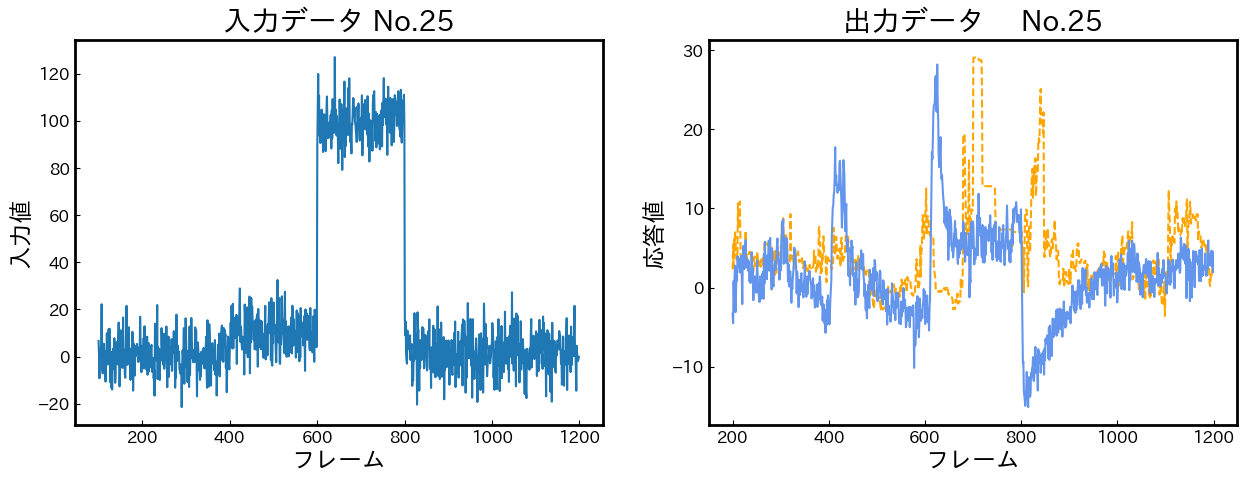

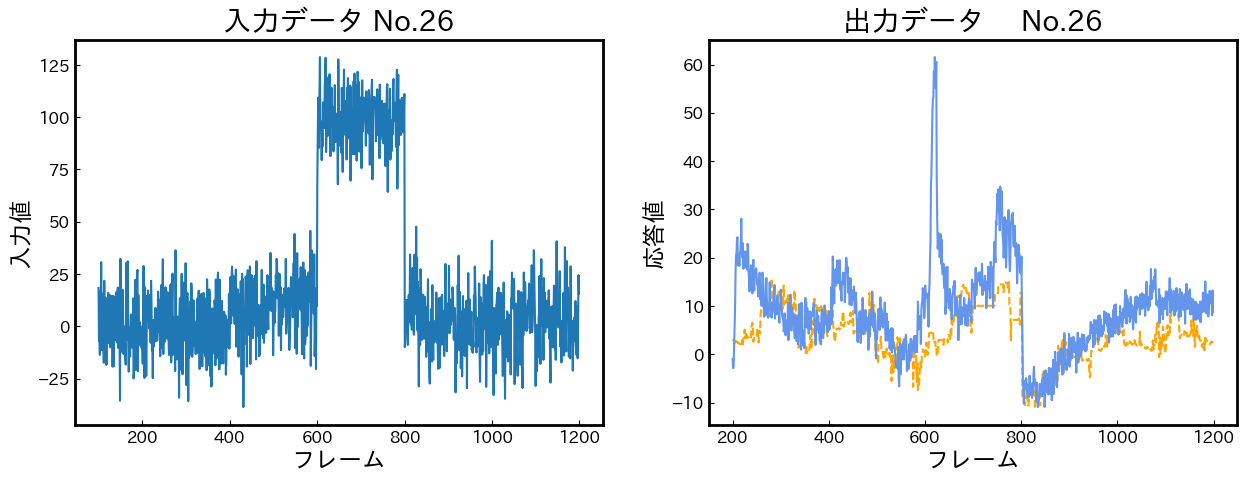

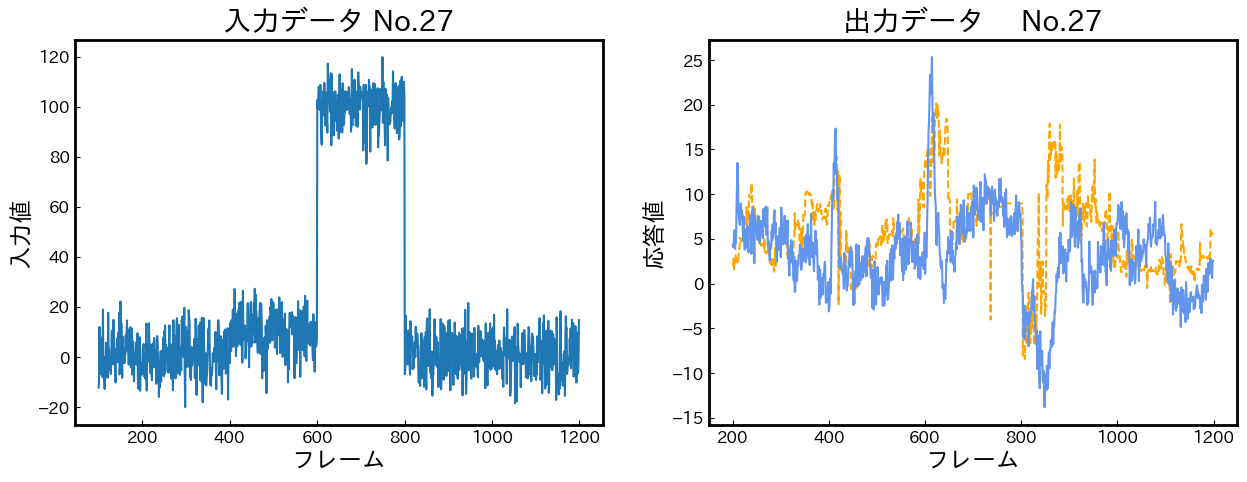

In [23]:
t1 = np.linspace(100, 1199, 1099)
t2 = np.linspace(200, 1199, 999)
for i in range(5):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]})
    ax1.plot(t1, white_noise[i+12, 100:])
    ax1.set_xlabel("フレーム")
    ax1.set_ylabel("入力値")
    ax1.set_title(f"入力データ No.{i+23}")
    ax1.grid()
    # 右側の折れ線グラフ
    ax2.plot(t2, pred_data1[:, i], linestyle="--", color="orange", label ="予測値")
    ax2.plot(t2, x_Q876x200[22+i, 200:], linestyle="-", color="cornflowerblue", label = "真の値")
    ax2.set_xlabel("フレーム")
    ax2.set_ylabel("応答値")
    ax2.set_title(f"出力データ　 No.{i+23}")
    ax2.grid()

    #plt.savefig(f"/data/Users/tsutsumi/VRNN/result/document/proj_1/predict_No{i+23}.png")
    plt.show()
    

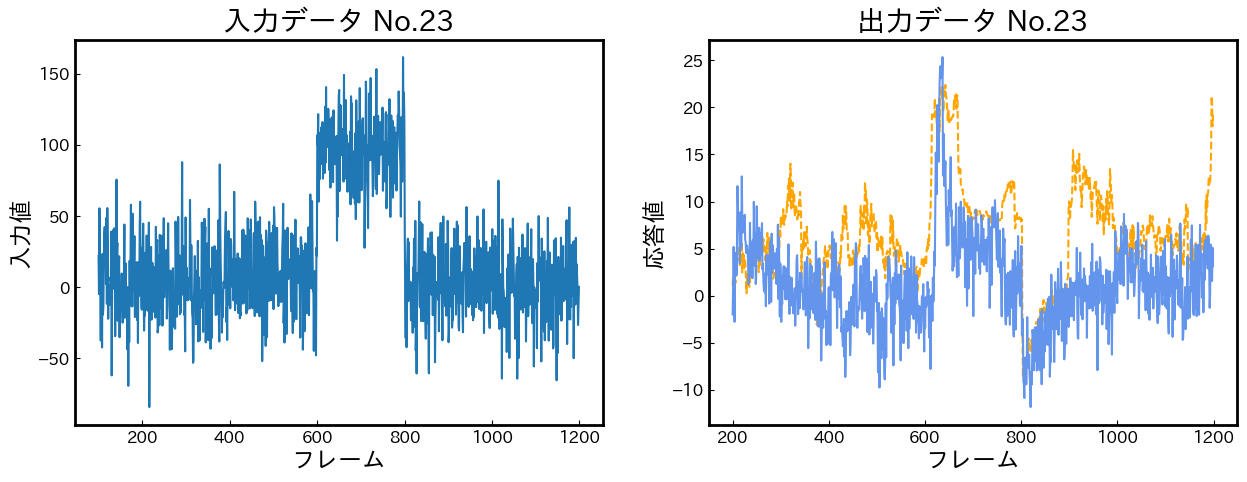

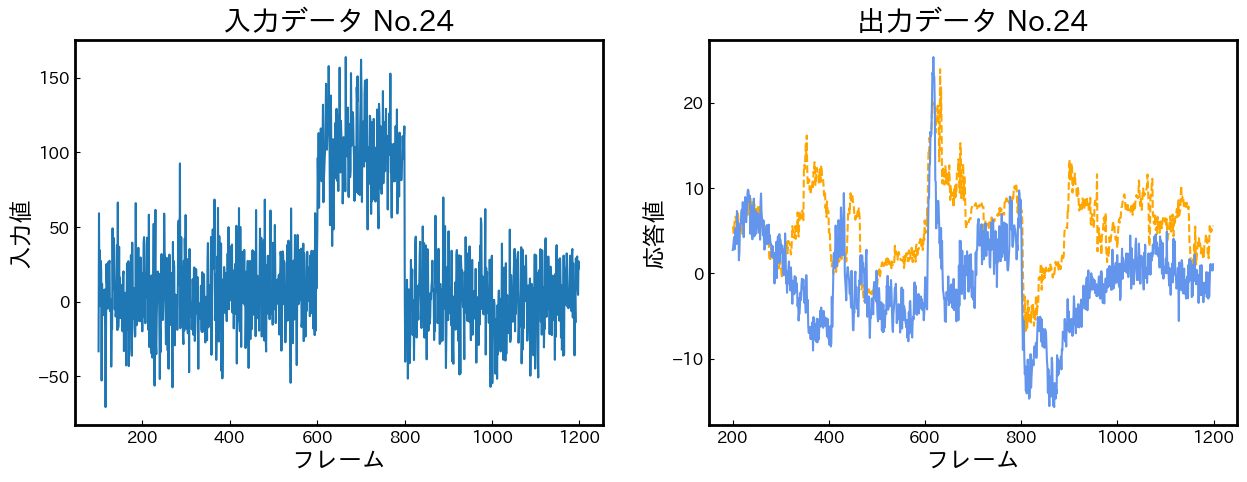

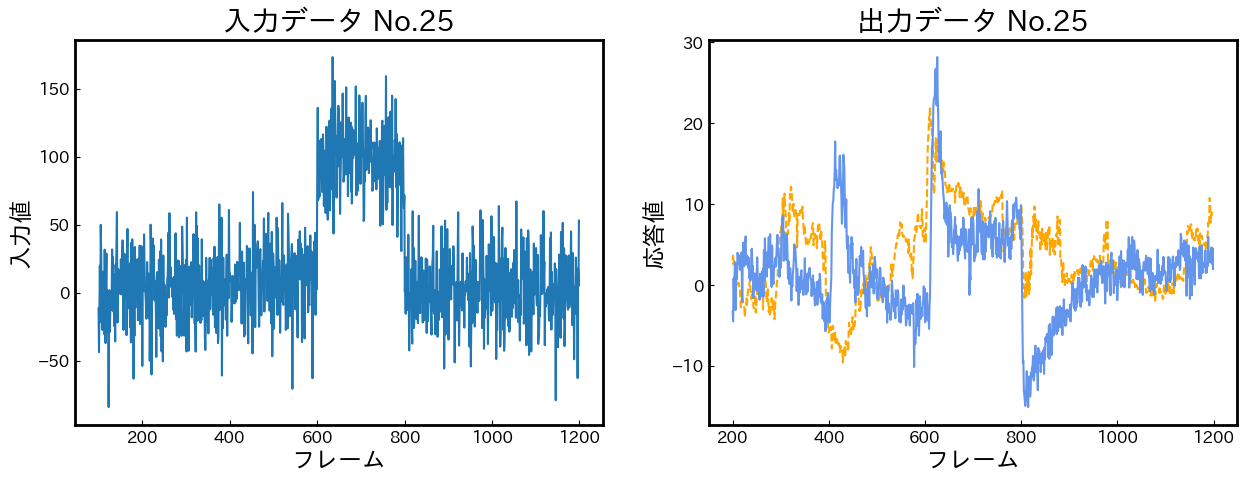

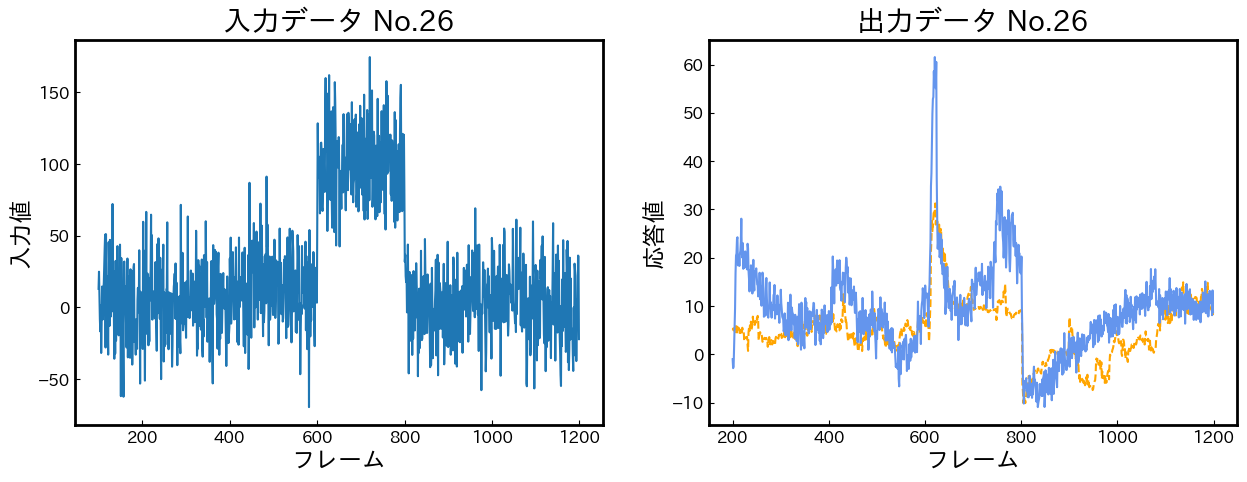

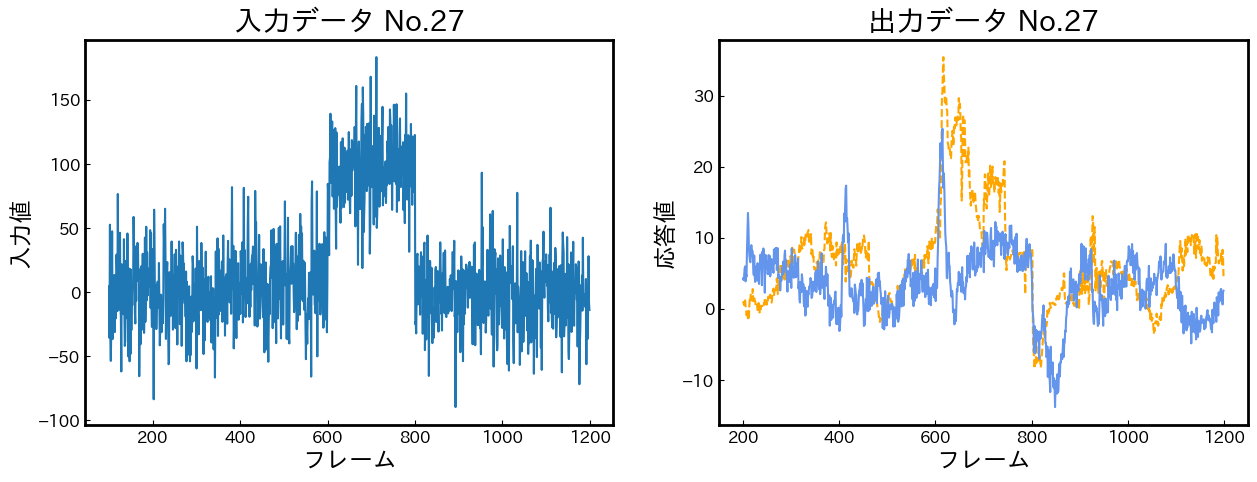

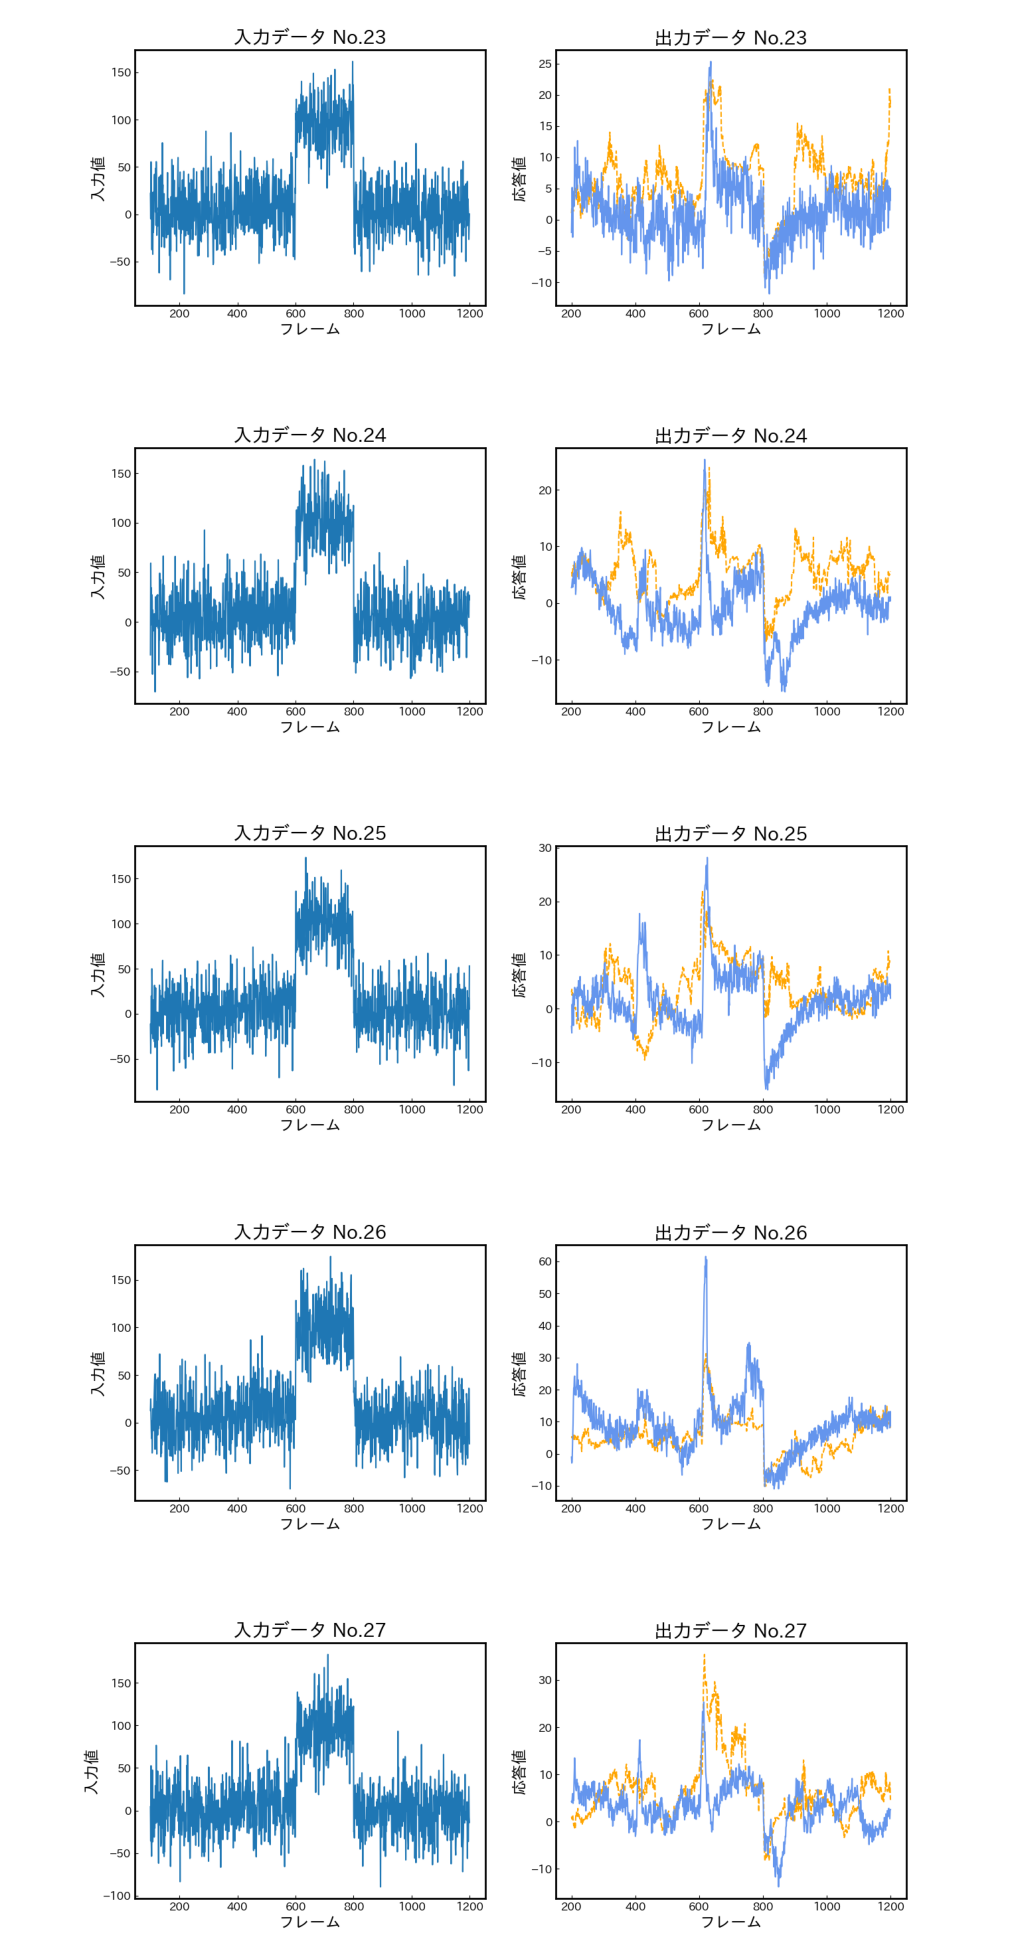

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# 時系列データ
t1 = np.linspace(100, 1199, 1099)
t2 = np.linspace(200, 1199, 999)

# 各プロットを保存するためのリスト
fig_list = []

for i in range(5):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # 左側の折れ線グラフ
    ax1.plot(t1, white_noise[i+12, 100:])
    ax1.set_xlabel("フレーム")
    ax1.set_ylabel("入力値")
    ax1.set_title(f"入力データ No.{i+23}")
    ax1.grid()
    
    # 右側の折れ線グラフ
    ax2.plot(t2, pred_data_all[:, i], linestyle="--", color="orange", label="予測値")
    ax2.plot(t2, x_Q876x200[22+i, 200:], linestyle="-", color="cornflowerblue", label="真の値")
    ax2.set_xlabel("フレーム")
    ax2.set_ylabel("応答値")
    ax2.set_title(f"出力データ No.{i+23}")
    ax2.grid()
    
    # 個別のプロットを保存するためにリストに追加
    fig_list.append(fig)

# 新しい図を作成して各プロットを縦に並べる
final_fig, final_axes = plt.subplots(len(fig_list), 1, figsize=(15, 5 * len(fig_list)))

for j, fig in enumerate(fig_list):
    # 各図の内容を新しい大きな図に描画
    canvas = fig.canvas
    canvas.draw()
    img = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    img = img.reshape(canvas.get_width_height()[::-1] + (3,))
    final_axes[j].imshow(img)
    final_axes[j].axis('off')  # 軸を非表示にする

# 最終的な画像を保存
final_fig.savefig("/data/Users/tsutsumi/VRNN/result/document/proj_all/combined_plot.png", bbox_inches='tight', pad_inches=0)
plt.show()


In [52]:
proj_data.shape

(1099, 34)

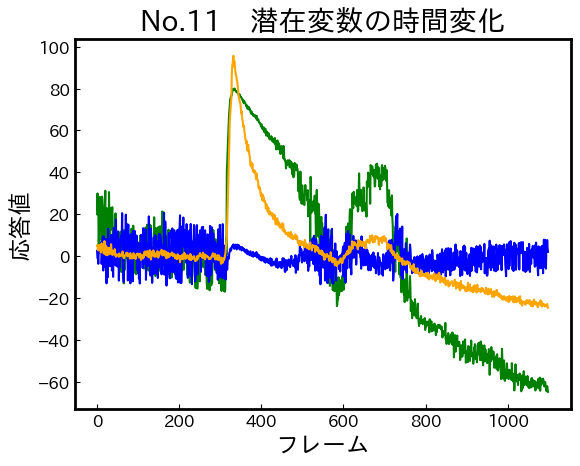

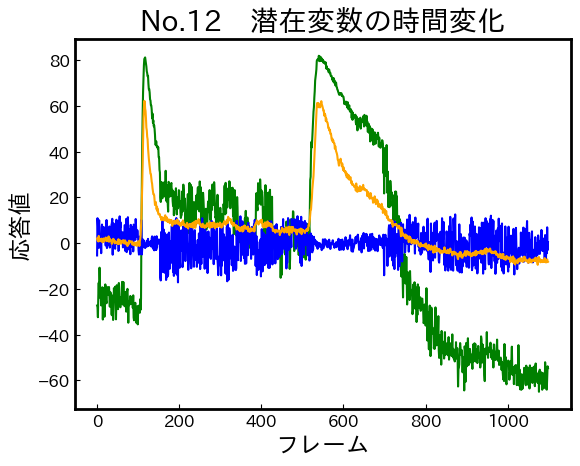

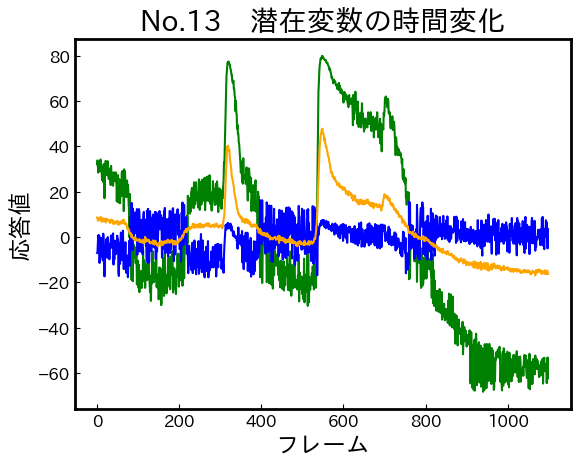

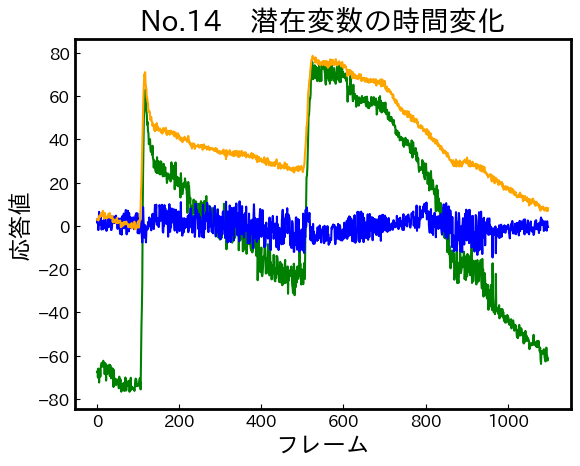

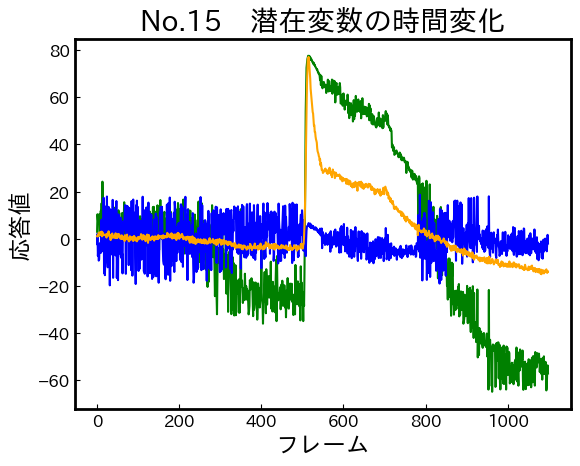

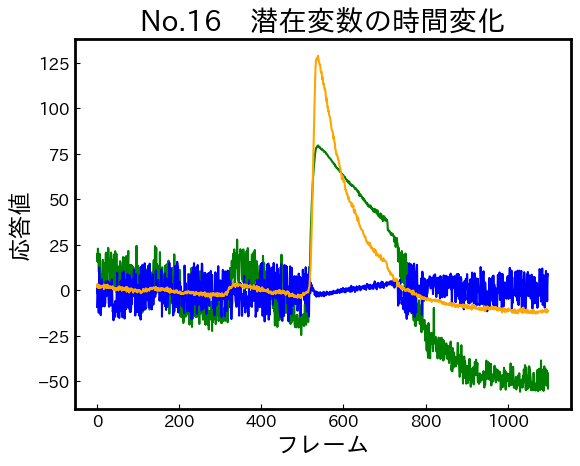

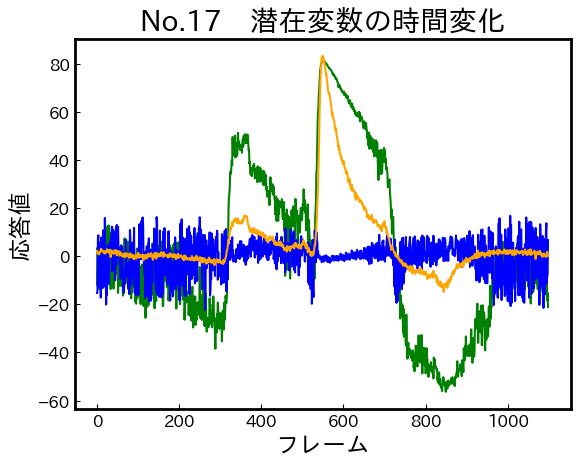

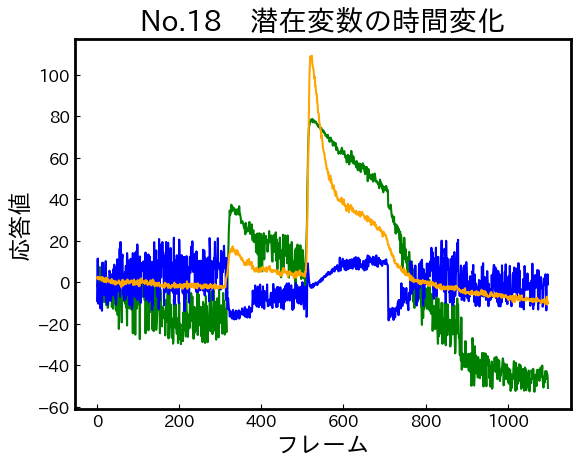

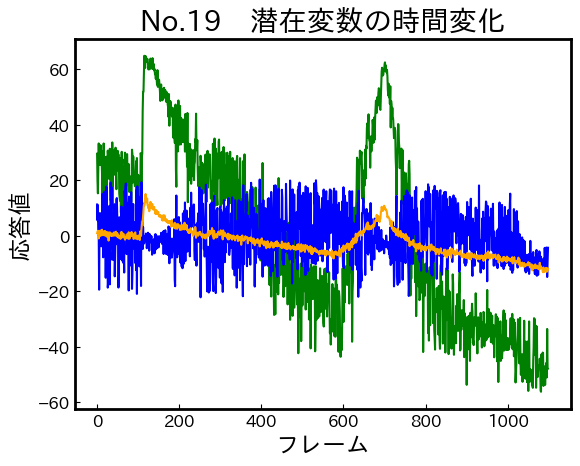

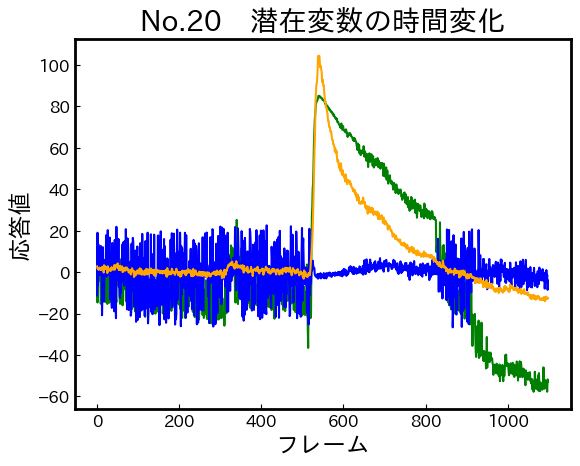

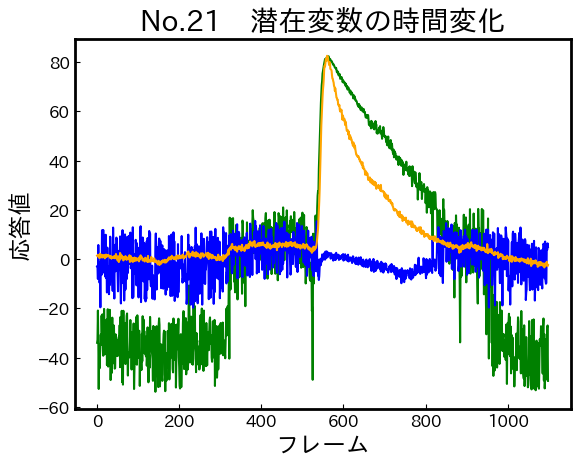

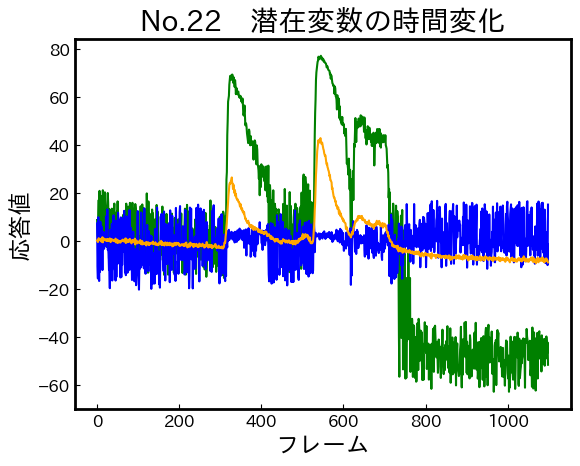

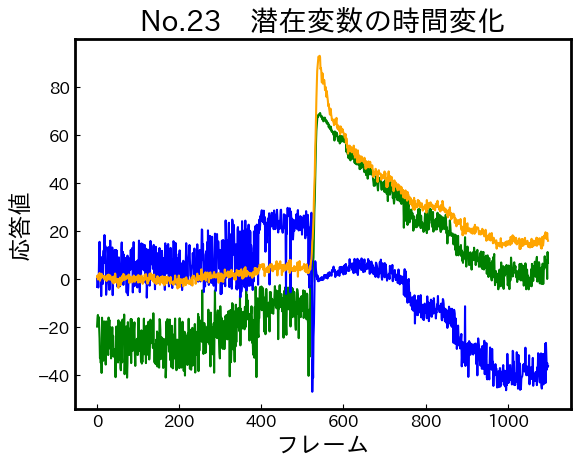

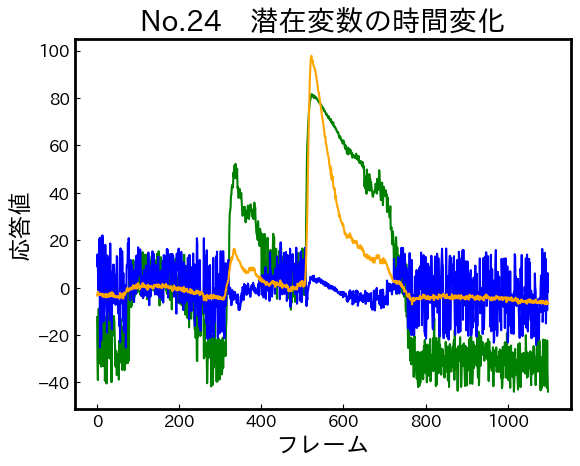

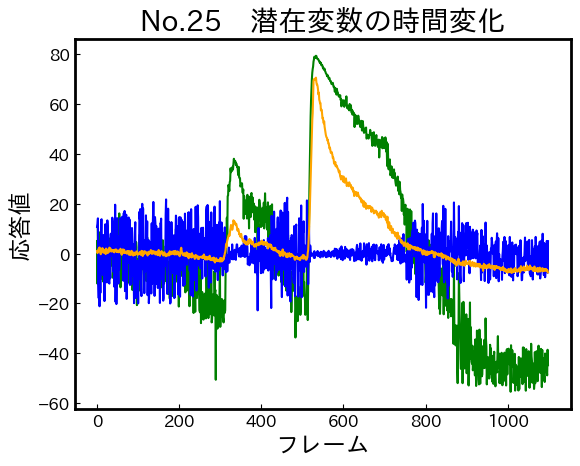

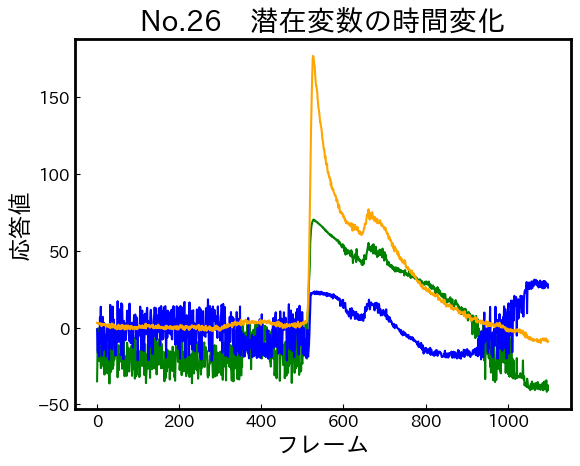

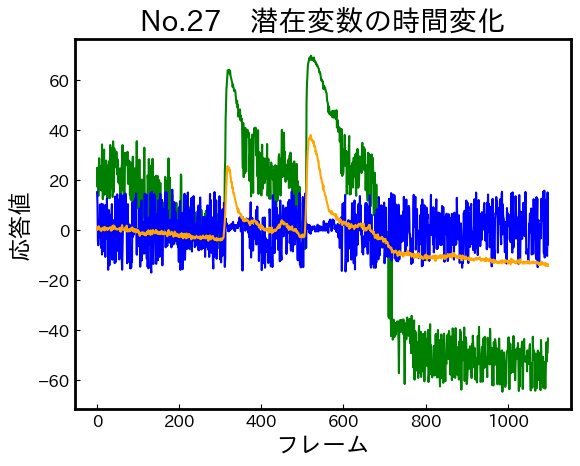

In [56]:
t1 = np.linspace(100, 1199, 1099)
t2 = np.linspace(200, 1199, 999)
for i in range(17):
    plt.plot(proj_data[:, 2*i], color="green")
    plt.plot(proj_data[:, 2*i+1], color="blue")
    plt.plot(x_G876x200[10+i, 100:], linestyle="-", color="orange", label = "真の値")

    plt.xlabel("フレーム")
    plt.ylabel("応答値")
    plt.title(f"No.{i+11}　潜在変数の時間変化")
    plt.grid()

    plt.savefig(f"/data/Users/tsutsumi/VRNN/result/document/t-SNE_No{i+23}.png")
    plt.show()